# Experiment: AlexNet implementation trained on COCO

We ran the challenge pipeline on our AlexNet model trained on the COCO dataset, which is the original source
of the stimulus images in the NSD dataset. It is also relatively large (328,000 images) with 80 classes and
multiple objects in the same image.

## Results

This model got a score of `24.18` when taken from layer `max_pooling2d_1`. This score improved to `32.96` when predictions from best layers were merged. This is the highest score that we got with our own implementation, without training on the entire ImageNet dataset.

Early ROIs were best correlated with early layers of the model while later layers were better correlated with later layers of the model. See the last cell for layers with best correlations for each ROI.

For example, here are the correlation graphs for `max_pooling2d_1` which has the highest correlation with V1v, and `dense_2` which has the highest correlation for the lateral and parietal streams.


### max_pooling_2d_1 (Subject 1)
Max pooling layer after the second convolutional layer

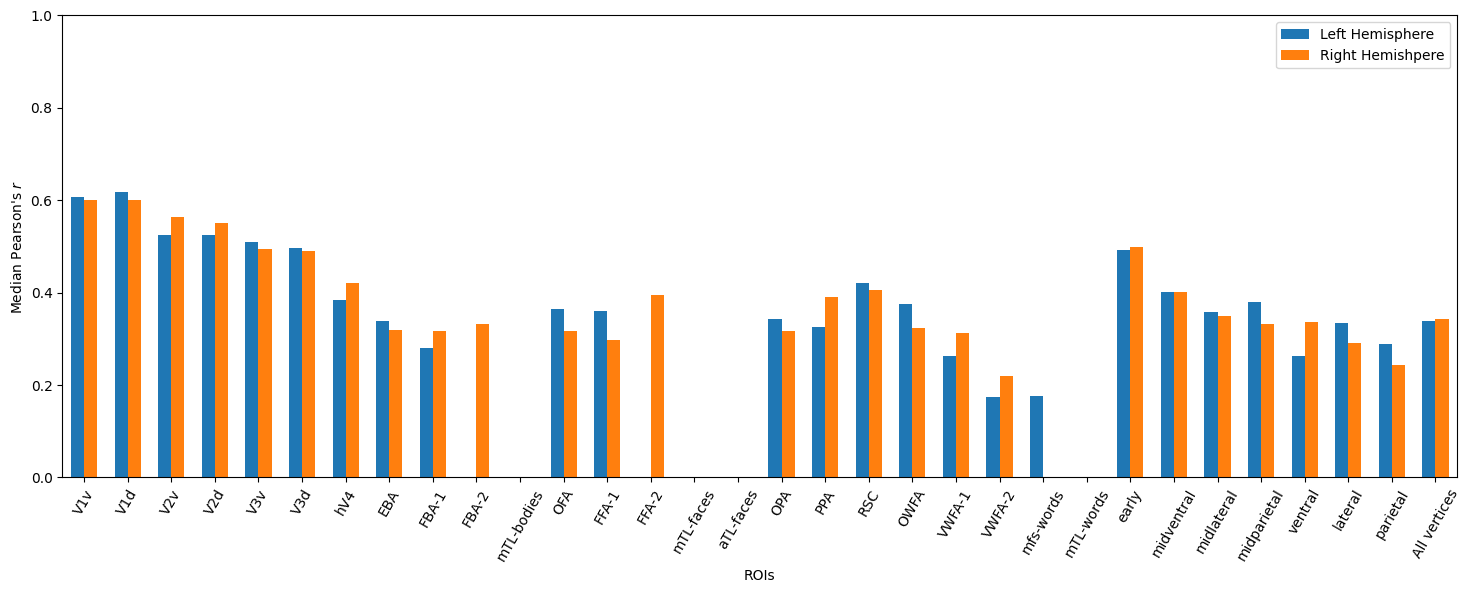

### dense_2 (Subject 1)

Second additional dense layer after convolutional layers (added on top for training with COCO)

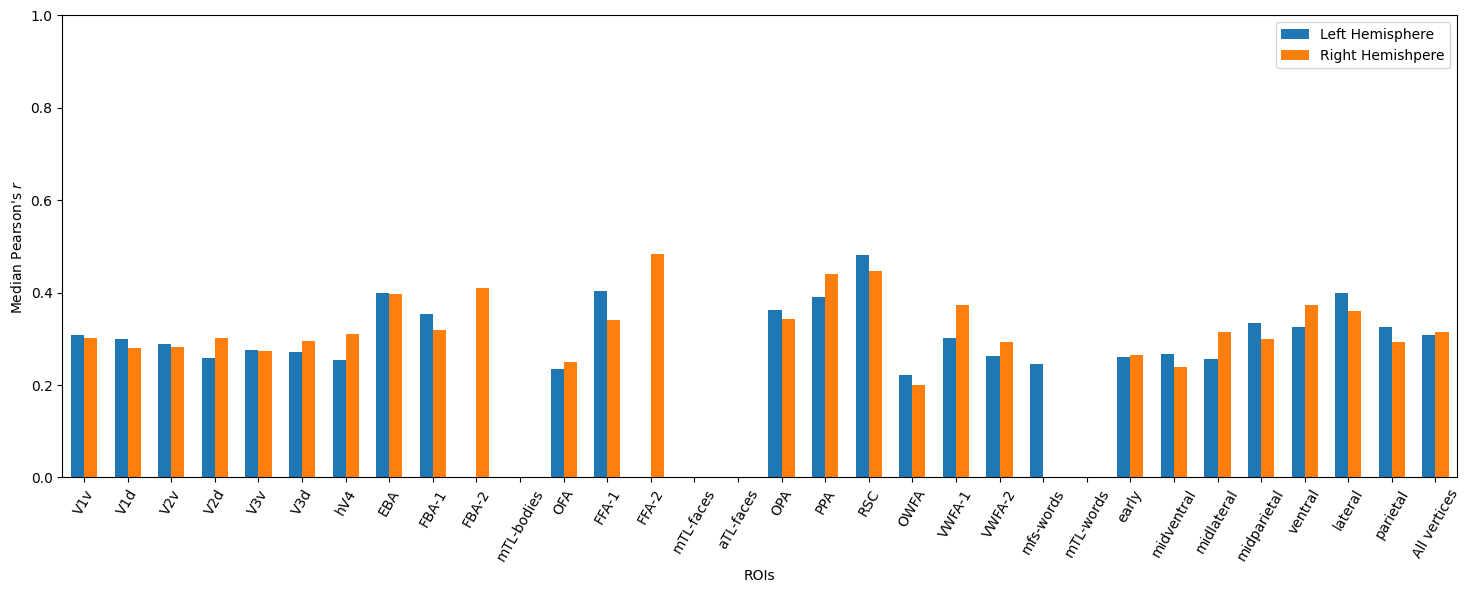




# Full Code

Below is the full code for running this model, which should generate all results for all layers and subjects.

Note that running the full pipeline will likely take hours.

In [ ]:
from src.algonauts.models import model_loaders
from src.algonauts.data_processors.image_transforms import transform_alexnet

In [ ]:
experiment = 'alexnet_coco_all_layers'
batch_size = 300

In [ ]:
platform = 'jupyter_notebook' #@param ['colab', 'paperspace'] {allow-input: true}

if platform == 'jupyter_notebook':
    data_dir = '../data'
    challenge_data_dir = f'{data_dir}/algonauts_2023_challenge_data'
    exp_output_dir = f'{data_dir}/out/{experiment}'

if platform == 'paperspace':
    data_dir = '.'
    challenge_data_dir = '/storage/algonauts_2023_challenge_data'
    exp_output_dir = f'/notebooks/data/out/{experiment}'

if platform == 'colab':
    data_dir = '/content/drive/MyDrive/algonauts23/data'
    challenge_data_dir = f'{data_dir}/algonauts_2023_challenge_data'
    exp_output_dir = f'{data_dir}/out/{experiment}'

### Load model

In [ ]:
model_filename = f'{data_dir}/models/alexnet-model.h5'  # model trained for 16 epochs with early stopping
model_loader = lambda: model_loaders.load_from_file(model_filename, transform_alexnet)

### Print the model layers

In [ ]:
model, _ = model_loader()
print(*(layer.name for layer in model.layers), sep=' -> ')
del model

2023-03-30 14:04:28.430191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-30 14:04:28.431363: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
conv2d -> batch_normalization -> max_pooling2d -> conv2d_1 -> batch_normalization_1 -> max_pooling2d_1 -> conv2d_2 -> batch_normalization_2 -> conv2d_3 -> batch_normalization_3 -> conv2d_4 -> batch_normalization_4 -> max_pooling2d_2 -> flatten -> dense -> dropout -> dense_1 -> dropout_1 -> dense_2


## Select layers and subjects
Now let's define which layer(s) we will pick from, and which subject(s) to process.

Best layer for all vertices was found to be 'conv2d_5_pool'

In [ ]:
layers = ['max_pooling2d', 'max_pooling2d_1', 'max_pooling2d_2', 'dense', 'dense_1', 'dense_2', 'batch_normalization', 'batch_normalization_2', 'batch_normalization_3']
subjects = [
    1, 2, 3, 4, 5, 6, 7, 8
    ]


## Run pipeline

In [ ]:
from src.algonauts.pipelines.tf_pipeline import run_tf_pipeline

run_tf_pipeline(batch_size=batch_size, model_loader=model_loader, layers=layers, subjects=subjects,
                challenge_data_dir=challenge_data_dir,
                exp_output_dir=exp_output_dir)

## Merge predictions from best layers for each ROI

In [ ]:
from src.algonauts.evaluators.predictions import merge_predictions_for_all_subjects
merge_predictions_for_all_subjects(subjects, challenge_data_dir, exp_output_dir)

## Print best layers

In [ ]:
import json
from src.algonauts.evaluators.correlations import find_best_correlations

subj = 1
result = find_best_correlations(f'{exp_output_dir}/results.json', subj)
print(json.dumps(result, indent=2))


{
  "LH": {
    "V1v": {
      "layer": "max_pooling2d_1",
      "value": 0.6066946609543842
    },
    "V1d": {
      "layer": "max_pooling2d_1",
      "value": 0.6173658981959638
    },
    "V2v": {
      "layer": "batch_normalization_2",
      "value": 0.5342268366085459
    },
    "V2d": {
      "layer": "batch_normalization_2",
      "value": 0.5278485451903228
    },
    "V3v": {
      "layer": "batch_normalization_2",
      "value": 0.5208314545347424
    },
    "V3d": {
      "layer": "batch_normalization_2",
      "value": 0.5065686705422011
    },
    "hV4": {
      "layer": "batch_normalization_2",
      "value": 0.40074671232707926
    },
    "EBA": {
      "layer": "dense_2",
      "value": 0.39880319304962725
    },
    "FBA-1": {
      "layer": "dense_2",
      "value": 0.3545185368221588
    },
    "FBA-2": {
      "layer": null,
      "value": null
    },
    "mTL-bodies": {
      "layer": null,
      "value": null
    },
    "OFA": {
      "layer": "batch_normalizatio